## Import and Load Data

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

 
# Sci-kit learn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

# This is used to overcome an issue with setting up tensorflow in M1/M1 
# Suspect tensorflow-macos not very fit with GPU, use CPU only with
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

filename = ('Data/train_data.csv')
df = pd.read_csv(filename)
pd.set_option('display.max_columns', None)
df.info()
df.head()
# 1460 rows
# 81 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploring Data

In [100]:
df.duplicated().sum()

0

In [101]:
pd.set_option('display.max_rows', None)
print(df.isna().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [102]:
# Dropping Columns: 
# They have too many missing values and imputing would introduce too much error

df.drop(columns =['Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu', 'LotFrontage'], 
        axis=1, inplace=True)



In [103]:
pd.set_option('display.max_rows', None)
print(df.isna().sum()* 100/len(df))

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinSF1       0.000000
BsmtFinType2     2.602740
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating          0.000000
HeatingQC   

**Missing Values**

Dropping 1 missing value from Electrical column.
Masnvrtype and Masvnrarea have missing values in the same rows. Only 8 of them so dropping all of these to reduce errors from imputation.

In [104]:
df.dropna(subset = ['Electrical','MasVnrType', 'MasVnrArea'], inplace=True)

In [105]:
pd.set_option('display.max_rows', None)
print(df.isna().sum()* 100/len(df))

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.549966
BsmtCond         2.549966
BsmtExposure     2.618884
BsmtFinType1     2.549966
BsmtFinSF1       0.000000
BsmtFinType2     2.618884
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating          0.000000
HeatingQC   

In [106]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [107]:
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= MSZoning
RL         1145
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64



- Column= Street
Pave    1445
Grvl       6
Name: Street, dtype: int64



- Column= LotShape
Reg    918
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64



- Column= LandContour
Lvl    1302
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64



- Column= Utilities
AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64



- Column= LotConfig
Inside     1045
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64



- Column= LandSlope
Gtl    1373
Mod      65
Sev      13
Name: LandSlope, dtype: int64



- Column= Neighborhood
NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     58
BrkSide     58
Crawfor     50
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      37
ClearCr     28
StoneBr     2

In [108]:
#Dropping columns: cannot adequately simplify. 
df.drop(columns = ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood',
                  'Condition1', 'Condition2', 'RoofMatl', 'Heating'],axis = 1, inplace = True)

In [109]:
df['MSZoning'] = df['MSZoning'].replace(['C (all)'],'C')

## Features Editing

In [110]:
# Simplifying MSZoning: Residential = 'Res' and Other
zoning_map = {'RL': 'Res',
             'RM': 'Res',
             'FV': 'Other',
             'RH': 'Res',
             'C': 'Other'}
df['MSZoning'] = df['MSZoning'].replace(zoning_map)
df['MSZoning'].value_counts()

Res      1379
Other      72
Name: MSZoning, dtype: int64

In [111]:
# Simplifying Lot Shape Column: Reg and Other
lot_map = {'Reg': 'Reg',
          'IR1': 'Other',
          'IR2': 'Other',
          'IR3': 'Other'}

df['LotShape']= df['LotShape'].replace(lot_map)
df['LotShape'].value_counts()

Reg      918
Other    533
Name: LotShape, dtype: int64

In [112]:
# Simplifying Lot Config to three options
config_map = {'Inside': 'Inside',
             'Corner': 'Corner',
             'CulDSac': 'Other',
             'FR2': 'Other',
             'FR3': 'Other'}
df['LotConfig'] = df['LotConfig'].replace(config_map)
df['LotConfig'].value_counts()

Inside    1045
Corner     262
Other      144
Name: LotConfig, dtype: int64

In [113]:
df['BldgType'].value_counts()

1Fam      1212
TwnhsE     113
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [114]:
# Simplifying Building type column
bldg_map = {'1Fam': '1Fam',
           'TwnhsE': 'Other',
           'Duplex': 'Other',
           'Twnhs': 'Other',
           '2fmCon': 'Other'}

df['BldgType'] = df['BldgType'].replace(bldg_map)
df['BldgType'].value_counts()

1Fam     1212
Other     239
Name: BldgType, dtype: int64

In [115]:
df['HouseStyle'].value_counts()

1Story    721
2Story    442
1.5Fin    154
SLvl       64
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [116]:
# Simplifying House Type Column
style_map = {'1Story': '1Story',
            '2Story': '2Story',
            '1.5Fin': 'Other',
            'SLvl': 'Other',
            'SFoyer': 'Other',
            '1.5Unf':'Other',
            '2.5Unf': 'Other',
            '2.5Fin': 'Other'}

df['HouseStyle'] = df['HouseStyle'].replace(style_map)
df['HouseStyle'].value_counts()

1Story    721
2Story    442
Other     288
Name: HouseStyle, dtype: int64

In [117]:
df['RoofStyle'].value_counts()

Gable      1133
Hip         285
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [118]:
roof_map = {'Gable': 'Gable',
           'Hip': 'Other',
           'Flat': 'Other',
           'Gambrel': 'Other',
           'Mansard': 'Other',
           'Shed': 'Other'}

df['RoofStyle'] = df['RoofStyle'].replace(roof_map)
df['RoofStyle'].value_counts()

Gable    1133
Other     318
Name: RoofStyle, dtype: int64

In [119]:
df['Exterior1st'].value_counts()

VinylSd    509
HdBoard    222
MetalSd    220
Wd Sdng    205
Plywood    108
CemntBd     59
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [120]:
# Simplifying Exterior1st column
exterior_map = {'VinylSd': 'VinylSd',
               'HdBoard': 'HdBoard',
               'MetalSd': 'MetalSd',
               'Wd Sdng': 'WdSdng',
               'Plywood': 'Plywood',
               'CemntBd': 'Other',
               'BrkFace': 'Other',
               'WdShing': 'Other',
               'Stucco': 'Other',
               'AsbShng': 'Other',
               'BrkComm': 'Other',
               'Stone': 'Other',
               'AsphShn': 'Other',
               'ImStucc': 'Other',
               'CBlock': 'Other'}

df['Exterior1st'] = df['Exterior1st'].replace(exterior_map)
df['Exterior1st'].value_counts()

VinylSd    509
HdBoard    222
MetalSd    220
WdSdng     205
Other      187
Plywood    108
Name: Exterior1st, dtype: int64

In [121]:
df['Exterior2nd'].value_counts()

VinylSd    498
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     58
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        4
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [122]:
# Simplifying Exterior 2 column
exterior2_map = {'VinylSd': 'VinylSd',
                'MetalSd': 'MetalSd',
                'HdBoard': 'HdBoard',
                'Wd Sdng': 'WdSdng',
                'Plywood': 'Plywood',
                'CmentBd': 'Other',
                'Wd Shng': 'Other',
                'Stucco': 'Other',
                'BrkFace': 'Other',
                'AsbShng': 'Other',
                'ImStucc': 'Other',
                'Brk Cmn': 'Other',
                'Stone': 'Other',
                'AsphShn': 'Other',
                'Other': 'Other',
                'CBlock': 'Other'}

df['Exterior2nd']= df['Exterior2nd'].replace(exterior2_map)
df['Exterior2nd'].value_counts()

VinylSd    498
MetalSd    214
HdBoard    207
WdSdng     197
Other      193
Plywood    142
Name: Exterior2nd, dtype: int64

In [123]:
df['MasVnrType'].value_counts()

None       863
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [124]:
# Simplifying column
vnr_map = {'None': 'None',
          'BrkFace': 'BrkFace',
          'Stone': 'Other',
          'BrkCmn': 'Other'}
df['MasVnrType'] = df['MasVnrType'].replace(vnr_map)
df['MasVnrType'].value_counts()

None       863
BrkFace    445
Other      143
Name: MasVnrType, dtype: int64

In [125]:
df['ExterQual'].value_counts()

TA    905
Gd    481
Ex     51
Fa     14
Name: ExterQual, dtype: int64

In [126]:
extq_map = {'TA': 'TA',
           'Gd': 'Gd',
           'Ex': 'Gd',
           'Fa': 'TA'}

df['ExterQual'] = df['ExterQual'].replace(extq_map)
df['ExterQual'].value_counts()

TA    919
Gd    532
Name: ExterQual, dtype: int64

In [127]:
df['ExterCond'].value_counts()

TA    1273
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [128]:
extc_map = {'TA': 'TA',
           'Gd': 'Gd',
           'Fa': 'TA',
           'Ex': 'Gd',
           'Po': 'TA'}

df['ExterCond'] = df['ExterCond'].replace(extc_map)
df['ExterCond'].value_counts()

TA    1302
Gd     149
Name: ExterCond, dtype: int64

In [129]:
df['Foundation'].value_counts()

PConc     638
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [130]:
found_map = {'PConc': 'PConc',
            'CBlock': 'CBlock',
            'BrkTil': 'Other',
            'Slab': 'Other',
            'Stone': 'Other',
            'Wood': 'Other'}

df['Foundation'] = df['Foundation'].replace(found_map)
df['Foundation'].value_counts()

PConc     638
CBlock    634
Other     179
Name: Foundation, dtype: int64

In [131]:
df['HeatingQC'].value_counts()

Ex    734
TA    427
Gd    240
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [132]:
heating_map = {'Ex': 'Gd',
              'TA': 'TA',
              'Gd': 'Gd',
              'Fa': 'TA',
              'Po': 'TA'}

df['HeatingQC'] = df['HeatingQC'].replace(heating_map)
df['HeatingQC'].value_counts()

Gd    974
TA    477
Name: HeatingQC, dtype: int64

In [133]:
df['Electrical'].value_counts()

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [134]:
elec_map = {'SBrkr': 'SBrkr',
           'FuseA': 'Other',
           'FuseF': 'Other',
           'FuseP': 'Other',
           'Mix': 'Other'}

df['Electrical'] = df['Electrical'].replace(elec_map)
df['Electrical'].value_counts()

SBrkr    1326
Other     125
Name: Electrical, dtype: int64

In [135]:
df['KitchenQual'].value_counts()

TA    734
Gd    579
Ex     99
Fa     39
Name: KitchenQual, dtype: int64

In [136]:
kit_map = {'TA':'TA',
          'Gd': 'Gd',
          'Ex':'Gd',
          'Fa': 'TA'}

df['KitchenQual'] = df['KitchenQual'].replace(kit_map)
df['KitchenQual'].value_counts()

TA    773
Gd    678
Name: KitchenQual, dtype: int64

In [137]:
df['Functional'].value_counts()

Typ     1352
Min2      34
Min1      31
Mod       15
Maj1      13
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [138]:
func_map = {'Typ': 'Typ',
           'Min2': 'Other',
           'Min1': 'Other',
           'Mod': 'Other',
           'Maj1': 'Other',
           'Maj2': 'Other',
           'Sev': 'Other'}

df['Functional'] = df['Functional'].replace(func_map)
df['Functional'].value_counts()

Typ      1352
Other      99
Name: Functional, dtype: int64

In [139]:
df['PavedDrive'].value_counts()

Y    1331
N      90
P      30
Name: PavedDrive, dtype: int64

In [140]:
drive_map = {'Y': 'Y',
            'N': 'Other',
            'P': 'Other'}

df['PavedDrive'] = df['PavedDrive'].replace(drive_map)
df['PavedDrive'].value_counts()

Y        1331
Other     120
Name: PavedDrive, dtype: int64

In [141]:
df['SaleType'].value_counts()

WD       1261
New       119
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [142]:
salet_map = {'WD': 'WD',
            'New': 'Other',
            'COD': 'Other',
            'ConLD': 'Other',
            'ConLI': 'Other',
            'ConLw': 'Other',
            'CWD': 'Other',
            'Oth': 'Other',
            'Con': 'Other'}

df['SaleType'] = df['SaleType'].replace(salet_map)
df['SaleType'].value_counts()



WD       1261
Other     190
Name: SaleType, dtype: int64

In [143]:
df['SaleCondition'].value_counts()

Normal     1193
Partial     122
Abnorml     101
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [144]:
salec_map = {'Normal': 'Normal',
            'Partial': 'Partial',
            'Abnorml': 'Other',
            'Family': 'Other',
            'Alloca': 'Other',
            'AdjLand': 'Other'}

df['SaleCondition'] = df['SaleCondition'].replace(salec_map)
df['SaleCondition'].value_counts()

Normal     1193
Other       136
Partial     122
Name: SaleCondition, dtype: int64

In [145]:
df.describe(include = 'number')

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1370.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,729.374225,56.933150,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,6.516885,0.612681,1978.353285,1.764990,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999
std,421.737858,42.350366,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,1.626576,0.643443,24.685798,0.748728,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,729.000000,50.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.500000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,1094.500000,70.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* MSSubClass and MonthSold are numbers that are representative. Month sold is number of the month
* MSSubClass has numbers that code for a type of dwelling; in data dictionary. 

## Missing Values

* Garage type, finish, quality and condition all have missing values for the same rows with a count of 81. All missing rows have a 'GarageArea'= 0 and 'GarageCars' =0. This implies no garage. 
* There is an 'NA' (no garage) option according to the data dictionary. 
* Making the assumption based on this information that these homes do not have garages and replacing the missing values with 'NA' or no garage. 

In [146]:
null_data = df[df.isnull().any(axis=1)]
null_data


,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,Res,10791,Reg,Inside,Other,1Story,4,5,1967,1967,Gable,MetalSd,MetalSd,None,0.0,TA,TA,Other,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,500,10,2006,WD,Normal,90000
39,40,90,Res,6040,Reg,Inside,Other,1Story,4,5,1955,1955,Gable,Other,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,N,Other,1152,0,0,1152,0,0,2,0,2,2,TA,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Other,0,0,0,0,0,0,0,6,2008,WD,Other,82000
48,49,190,Res,4456,Reg,Inside,Other,2Story,4,5,1920,2008,Gable,MetalSd,MetalSd,None,0.0,TA,TA,Other,TA,TA,No,Unf,0,Unf,0,736,736,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Other,0,0,102,0,0,0,0,6,2009,Other,Partial,113000
78,79,90,Res,10778,Reg,Inside,Other,1Story,4,5,1968,1968,Other,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
88,89,50,Other,8470,Other,Corner,1Fam,Other,3,2,1915,1982,Other,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,TA,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Other,0,0,156,0,0,0,0,10,2009,Other,Other,85000
89,90,20,Res,8070,Reg,Inside,1Fam,1Story,4,5,1994,1995,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,Gd,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600
90,91,20,Res,7200,Reg,Inside,1Fam,1Story,4,5,1950,1950,Gable,Other,WdSdng,None,0.0,TA,TA,Other,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,Y,Other,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,0,7,2006,WD,Normal,109900
99,100,20,Res,9320,Other,Inside,1Fam,1Story,4,5,1959,1959,Gable,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,TA,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,400,1,2010,WD,Normal,128950
102,103,90,Res,7018,Reg,Inside,Other,1Story,5,5,1979,1979,Gable,HdBoard,HdBoard,None,0.0,TA,TA,Other,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Other,118964
108,109,50,Res,8500,Reg,Corner,1Fam,Other,5,7,1919,2005,Gable,Other,Other,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,793,TA,N,Other,997,520,0,1517,0,0,2,0,3,1,TA,7,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Other,0,0,144,0,0,0,0,8,2007,WD,Normal,115000


In [147]:
df['GarageType'].fillna('NA', inplace = True)
df['GarageYrBlt'].fillna(0, inplace = True)
df['GarageFinish'].fillna('NA', inplace = True)
df['GarageQual'].fillna('NA', inplace = True)
df['GarageCond'].fillna('NA', inplace = True)
null_data2 = df[df.isnull().any(axis=1)]
null_data2

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,Res,10791,Reg,Inside,Other,1Story,4,5,1967,1967,Gable,MetalSd,MetalSd,None,0.0,TA,TA,Other,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,500,10,2006,WD,Normal,90000
39,40,90,Res,6040,Reg,Inside,Other,1Story,4,5,1955,1955,Gable,Other,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,N,Other,1152,0,0,1152,0,0,2,0,2,2,TA,6,Typ,0,NA,0.0,NA,0,0,NA,NA,Other,0,0,0,0,0,0,0,6,2008,WD,Other,82000
90,91,20,Res,7200,Reg,Inside,1Fam,1Story,4,5,1950,1950,Gable,Other,WdSdng,None,0.0,TA,TA,Other,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,Y,Other,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,0,7,2006,WD,Normal,109900
102,103,90,Res,7018,Reg,Inside,Other,1Story,5,5,1979,1979,Gable,HdBoard,HdBoard,None,0.0,TA,TA,Other,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Other,118964
156,157,20,Res,7200,Reg,Inside,1Fam,1Story,5,7,1950,1950,Other,WdSdng,WdSdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,Y,Other,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,109500
182,183,20,Res,9060,Reg,Inside,1Fam,1Story,5,6,1957,2006,Other,WdSdng,WdSdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Gd,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,0,6,2007,WD,Normal,120000
259,260,20,Res,12702,Reg,Inside,1Fam,1Story,5,5,1956,1956,Gable,Other,Other,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Gd,Y,Other,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,0,12,2008,WD,Normal,97000
332,333,20,Res,10655,Other,Inside,1Fam,1Story,8,5,2003,2004,Gable,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,Gd,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,0,10,2009,WD,Normal,284000
342,343,90,Res,8544,Reg,Inside,Other,1Story,3,4,1949,1950,Gable,Other,Other,BrkFace,340.0,TA,TA,Other,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,N,Other,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,0,5,2006,WD,Normal,87500
362,363,85,Res,7301,Reg,Corner,1Fam,Other,7,5,2003,2003,Gable,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Other,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Gd,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,0,7,2009,Other,Normal,198500


**Features Editing**

In [148]:
df['GarageType'].value_counts()

Attchd     863
Detchd     387
BuiltIn     86
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [149]:
gtype_map = {'Attchd': 'Attchd',
            'Detchd': 'Detchd',
            'BuiltIn': 'Other',
            'NA': 'Other',
            'Basment': 'Other',
            'CarPort': 'Other',
            '2Types': 'Other',}

df['GarageType'] = df['GarageType'].replace(gtype_map)
df['GarageType'].value_counts()

Attchd    863
Detchd    387
Other     201
Name: GarageType, dtype: int64

In [150]:
df['GarageFinish'].value_counts()

Unf    605
RFn    418
Fin    347
NA      81
Name: GarageFinish, dtype: int64

In [151]:
gfin_map = {'Unf': 'Unf',
           'RFn': 'Other',
           'Fin': 'Fin',
           'NA': 'Other'}

df['GarageFinish'] = df['GarageFinish'].replace(gfin_map)
df['GarageFinish'].value_counts()

Unf      605
Other    499
Fin      347
Name: GarageFinish, dtype: int64

In [152]:
df['GarageQual'].value_counts()

TA    1302
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [153]:
gqual_map = {'TA':'TA',
            'NA': 'Other',
            'Fa': 'TA',
            'Gd': 'Other',
            'Ex': 'Other',
            'Po': 'Other'}

df['GarageQual'] = df['GarageQual'].replace(gqual_map)
df['GarageQual'].value_counts()

TA       1350
Other     101
Name: GarageQual, dtype: int64

In [154]:
df['GarageCond'].value_counts()

TA    1317
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [155]:
gcond_map = {'TA': 'TA',
            'NA': 'Other',
            'Fa': 'TA',
            'Gd': 'Other',
            'Po': 'Other',
            'Ex': 'Other'}

df['GarageCond'] = df['GarageCond'].replace(gcond_map)
df['GarageCond'].value_counts()

TA       1352
Other      99
Name: GarageCond, dtype: int64

**Missing Values**
* For Basement Quality, Condition, Exposure, Finish type 1, and Finish type 2, all but two rows that have missing values also have 0 total basement sq ft. 
* No square footage implies no basement. Will replace these with 'NA' (no basement)

In [156]:
# First row with missing values that actually has a basement
df.loc[df['TotalBsmtSF'] == 3206]

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,Res,10655,Other,Inside,1Fam,1Story,8,5,2003,2004,Gable,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,Gd,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2003.0,Other,3,880,TA,TA,Y,0,0,0,0,0,0,0,10,2009,WD,Normal,284000


**Assumptions and Logic**

* Imputing the basement finish type 2 to most frequent value after 'unfinished' which is the most frequent for the column, however there is square footage for 'BsmtFinSF2' which implies it is finished.
* Next most common after unfinished is 'Rec' for recreation which has a higher likelihood of being accurate than just the most-frequent value (unfinished)

In [157]:
df.loc[332,"BsmtFinType2"]= 'Rec'

In [158]:
df.loc[df['TotalBsmtSF'] == 3206]

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,Res,10655,Other,Inside,1Fam,1Story,8,5,2003,2004,Gable,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,Rec,479,1603,3206,Gd,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2003.0,Other,3,880,TA,TA,Y,0,0,0,0,0,0,0,10,2009,WD,Normal,284000


In [159]:
df.loc[(df['TotalBsmtSF'] == 936) & (df['BsmtUnfSF'] == 936)]

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
821,822,20,Res,6000,Reg,Inside,Other,1Story,4,4,1953,1953,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,936,936,TA,N,SBrkr,936,0,0,936,0,0,1,0,2,1,TA,4,Other,0,Detchd,1974.0,Unf,2,576,TA,TA,Y,0,32,112,0,0,0,0,2,2009,WD,Normal,93000
948,949,60,Res,14006,Other,Inside,1Fam,2Story,7,5,2002,2002,Gable,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,Gd,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,Attchd,2002.0,Other,2,474,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,Normal,192500
1433,1434,60,Res,10261,Other,Inside,1Fam,2Story,6,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,318.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,936,936,Gd,Y,SBrkr,962,830,0,1792,1,0,2,1,3,1,TA,8,Typ,1,Attchd,2000.0,Fin,2,451,TA,TA,Y,0,0,0,0,0,0,0,5,2008,WD,Normal,186500


In [160]:
# Imputed with most frequent value of 'No'
df.loc[948,"BsmtExposure"]= 'No'

In [161]:
# Checking the imputations were made. Will replace all missing with 'NA' 
# (no basement)
null_data3 = df[df.isnull().any(axis=1)]
null_data3

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,Res,10791,Reg,Inside,Other,1Story,4,5,1967,1967,Gable,MetalSd,MetalSd,None,0.0,TA,TA,Other,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,Other,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,500,10,2006,WD,Normal,90000
39,40,90,Res,6040,Reg,Inside,Other,1Story,4,5,1955,1955,Gable,Other,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,N,Other,1152,0,0,1152,0,0,2,0,2,2,TA,6,Typ,0,Other,0.0,Other,0,0,Other,Other,Other,0,0,0,0,0,0,0,6,2008,WD,Other,82000
90,91,20,Res,7200,Reg,Inside,1Fam,1Story,4,5,1950,1950,Gable,Other,WdSdng,None,0.0,TA,TA,Other,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,Y,Other,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,0,7,2006,WD,Normal,109900
102,103,90,Res,7018,Reg,Inside,Other,1Story,5,5,1979,1979,Gable,HdBoard,HdBoard,None,0.0,TA,TA,Other,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Other,118964
156,157,20,Res,7200,Reg,Inside,1Fam,1Story,5,7,1950,1950,Other,WdSdng,WdSdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,Y,Other,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,109500
182,183,20,Res,9060,Reg,Inside,1Fam,1Story,5,6,1957,2006,Other,WdSdng,WdSdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Gd,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Attchd,1957.0,Other,1,252,TA,TA,Y,116,0,0,180,0,0,0,6,2007,WD,Normal,120000
259,260,20,Res,12702,Reg,Inside,1Fam,1Story,5,5,1956,1956,Gable,Other,Other,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Gd,Y,Other,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,0,12,2008,WD,Normal,97000
342,343,90,Res,8544,Reg,Inside,Other,1Story,3,4,1949,1950,Gable,Other,Other,BrkFace,340.0,TA,TA,Other,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,N,Other,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,0,5,2006,WD,Normal,87500
362,363,85,Res,7301,Reg,Corner,1Fam,Other,7,5,2003,2003,Gable,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Other,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Gd,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Other,2003.0,Other,2,672,TA,TA,Y,0,0,177,0,0,0,0,7,2009,Other,Normal,198500
371,372,50,Res,17120,Reg,Inside,1Fam,Other,4,4,1959,1959,Gable,Other,Plywood,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,TA,Y,SBrkr,1120,468,0,1588,0,0,2,0,4,1,TA,7,Other,1,Detchd,1991.0,Fin,2,680,TA,TA,Other,0,59,0,0,0,0,0,7,2008,WD,Normal,134432


In [162]:
# Replace basement missing values with  'no basement'
df['BsmtQual'].fillna('NA', inplace = True)
df['BsmtCond'].fillna('NA', inplace = True)
df['BsmtExposure'].fillna('NA', inplace = True)
df['BsmtFinType1'].fillna('NA', inplace = True)
df['BsmtFinType2'].fillna('NA', inplace = True)


**Features Editing**

In [163]:
df['BsmtQual'].value_counts()

TA    648
Gd    611
Ex    120
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [164]:
bsmq_map = {'TA': 'TA',
           'Gd': 'Gd',
           'Ex': 'Gd',
           'NA': 'Other',
           'Fa': 'Other'}

df['BsmtQual'] = df['BsmtQual'].replace(bsmq_map)
df['BsmtQual'].value_counts()

Gd       731
TA       648
Other     72
Name: BsmtQual, dtype: int64

In [165]:
df['BsmtCond'].value_counts()

TA    1303
Gd      64
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

In [166]:
bsmc_map = {'TA': 'TA',
           'Gd': 'Other',
           'Fa': 'Other',
           'NA': 'Other',
           'Po': 'Other'}

df['BsmtCond'] = df['BsmtCond'].replace(bsmc_map)
df['BsmtCond'].value_counts()

TA       1303
Other     148
Name: BsmtCond, dtype: int64

In [167]:
df['BsmtExposure'].value_counts()


No    946
Av    221
Gd    133
Mn    114
NA     37
Name: BsmtExposure, dtype: int64

In [168]:
bsme_map = {'No': 'No',
           'Av': 'Av',
           'Gd': 'Av',
           'Mn': 'Other',
           'NA': 'Other'}

df['BsmtExposure'] = df['BsmtExposure'].replace(bsme_map)
df['BsmtExposure'].value_counts()

No       946
Av       354
Other    151
Name: BsmtExposure, dtype: int64

In [169]:
df['BsmtFinType1'].value_counts()

Unf    427
GLQ    413
ALQ    220
BLQ    148
Rec    132
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64

In [170]:
bsmf1_map = {'Unf':'Unf',
            'GLQ': 'ALQ',
            'ALQ': 'ALQ',
            'BLQ': 'BLQ',
            'Rec': 'Other',
            'LwQ': 'BLQ',
            'NA': 'Other'}

df['BsmtFinType1'] = df['BsmtFinType1'].replace(bsmf1_map)
df['BsmtFinType1'].value_counts()

ALQ      633
Unf      427
BLQ      222
Other    169
Name: BsmtFinType1, dtype: int64

In [171]:
df['BsmtFinType2'].value_counts()

Unf    1247
Rec      55
LwQ      46
NA       37
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [172]:
bsmf2_map = {'Unf':'Unf',
            'Rec': 'Other',
            'LwQ': 'Other',
            'NA': 'Other',
            'BLQ': 'Other',
            'ALQ': 'Other',
            'GLQ': 'Other'}

df['BsmtFinType2'] = df['BsmtFinType2'].replace(bsmf2_map)
df['BsmtFinType2'].value_counts()

Unf      1247
Other     204
Name: BsmtFinType2, dtype: int64

In [173]:
# Checking for missing values
pd.set_option('display.max_rows', None)
print(df.isna().sum()* 100/len(df))

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
LotShape         0.0
LotConfig        0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
GarageType       0.0
GarageYrBlt  

In [174]:
df.nunique()

Id               1451
MSSubClass         15
MSZoning            2
LotArea          1066
LotShape            2
LotConfig           3
BldgType            2
HouseStyle          3
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           2
Exterior1st         6
Exterior2nd         6
MasVnrType          3
MasVnrArea        327
ExterQual           2
ExterCond           2
Foundation          3
BsmtQual            3
BsmtCond            2
BsmtExposure        3
BsmtFinType1        4
BsmtFinSF1        633
BsmtFinType2        2
BsmtFinSF2        144
BsmtUnfSF         777
TotalBsmtSF       717
HeatingQC           2
CentralAir          2
Electrical          2
1stFlrSF          748
2ndFlrSF          414
LowQualFinSF       24
GrLivArea         858
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         2
TotRmsAbvGrd       12
Functional          2
Fireplaces

In [175]:
# Dropping because of high cardinality
df.drop(columns = ['Id'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotArea        1451 non-null   int64  
 3   LotShape       1451 non-null   object 
 4   LotConfig      1451 non-null   object 
 5   BldgType       1451 non-null   object 
 6   HouseStyle     1451 non-null   object 
 7   OverallQual    1451 non-null   int64  
 8   OverallCond    1451 non-null   int64  
 9   YearBuilt      1451 non-null   int64  
 10  YearRemodAdd   1451 non-null   int64  
 11  RoofStyle      1451 non-null   object 
 12  Exterior1st    1451 non-null   object 
 13  Exterior2nd    1451 non-null   object 
 14  MasVnrType     1451 non-null   object 
 15  MasVnrArea     1451 non-null   float64
 16  ExterQual      1451 non-null   object 
 17  ExterCond      1451 non-null   object 
 18  Foundati

In [176]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['MSZoning', 'LotShape', 'LotConfig', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [177]:
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= MSZoning
Res      1379
Other      72
Name: MSZoning, dtype: int64



- Column= LotShape
Reg      918
Other    533
Name: LotShape, dtype: int64



- Column= LotConfig
Inside    1045
Corner     262
Other      144
Name: LotConfig, dtype: int64



- Column= BldgType
1Fam     1212
Other     239
Name: BldgType, dtype: int64



- Column= HouseStyle
1Story    721
2Story    442
Other     288
Name: HouseStyle, dtype: int64



- Column= RoofStyle
Gable    1133
Other     318
Name: RoofStyle, dtype: int64



- Column= Exterior1st
VinylSd    509
HdBoard    222
MetalSd    220
WdSdng     205
Other      187
Plywood    108
Name: Exterior1st, dtype: int64



- Column= Exterior2nd
VinylSd    498
MetalSd    214
HdBoard    207
WdSdng     197
Other      193
Plywood    142
Name: Exterior2nd, dtype: int64



- Column= MasVnrType
None       863
BrkFace    445
Other      143
Name: MasVnrType, dtype: int64



- Column= ExterQual
TA    919
Gd    532
Name: ExterQual, dtype: int64



- Column= ExterCond
TA

**Summary**
1. Dropped some rows to avoid imputing with error. 
2. Dropped multiple columns because of excessive missing data and inability to simplify in a meaningful way for ML. 
3. Dropped a column for high cardinality
4. Manually imputed some missing values with the most frequent but logical option from the column. 
5. Feature edited to simplify columns which will benefit machine learning. 

## Preprocessing

In [178]:
# Learning history plotting function
def plot_history(history):
  #Takes a keras model learning history and plots each metric
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()
        

In [179]:
# split data
 
X = df.drop(columns='SalePrice')
y = df['SalePrice']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

**Transformers**


In [180]:
# Transformers
ohe = OneHotEncoder()
scaler = StandardScaler()

In [181]:
# List of columns for transformers
cat_selector = make_column_selector(dtype_include = 'object')

num_selector = make_column_selector(dtype_include = 'number')


In [182]:
# Tuples

cat_tuple = (ohe, cat_selector)

num_tuple = (scaler, num_selector)

# Preprocessor

preprocessor = make_column_transformer(cat_tuple, num_tuple,
                                      remainder = 'drop')



In [183]:
# Fit on train and transform both
# process the data
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed.shape

(1088, 112)

## Iteration 1:

In [184]:
# create model architecture
input_dim = X_train_processed.shape[1]
 
reg_model = Sequential()
 
reg_model.add(Dense(10, input_dim=input_dim, activation='relu'))
reg_model.add(Dense(10, activation='relu'))

# Output Layer with 1 node
reg_model.add(Dense(1, activation='linear')) ## Regression model

 
reg_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                1130      
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [185]:
# compile model with additional metrics 
reg_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

In [186]:
history = reg_model.fit(X_train_processed, y_train,
                        validation_data = (X_test_processed, y_test),
                        epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 39693058048.0000 - mean_absolute_error: 181763.4688 - root_mean_squared_error: 199231.1719 - val_loss: 36566020096.0000 - val_mean_absolute_error: 177205.2500 - val_root_mean_squared_error: 191222.4375
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 39692005376.0000 - mean_absolute_error: 181760.9062 - root_mean_squared_error: 199228.5312 - val_loss: 36564504576.0000 - val_mean_absolute_error: 177201.3906 - val_root_mean_squared_error: 191218.4688
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 39689617408.0000 - mean_absolute_error: 181755.1094 - root_mean_squared_error: 199222.5312 - val_loss: 36561276928.0000 - val_mean_absolute_error: 177193.1875 - val_root_mean_squared_error: 191210.0312
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 39684960256.0000 - mean_absolute_error: 181743.6250 - root_mean_squared_error: 199210.8438 - val_loss:

Epoch 31/100
34/34 [==============================] - 0s 1ms/step - loss: 35137282048.0000 - mean_absolute_error: 170084.7812 - root_mean_squared_error: 187449.4062 - val_loss: 32034172928.0000 - val_mean_absolute_error: 165161.6719 - val_root_mean_squared_error: 178980.9219
Epoch 32/100
34/34 [==============================] - 0s 1ms/step - loss: 34727833600.0000 - mean_absolute_error: 168990.2812 - root_mean_squared_error: 186354.0469 - val_loss: 31633354752.0000 - val_mean_absolute_error: 164055.4844 - val_root_mean_squared_error: 177857.6875
Epoch 33/100
34/34 [==============================] - 0s 1ms/step - loss: 34297753600.0000 - mean_absolute_error: 167848.8125 - root_mean_squared_error: 185196.5312 - val_loss: 31217973248.0000 - val_mean_absolute_error: 162901.1719 - val_root_mean_squared_error: 176686.0938
Epoch 34/100
34/34 [==============================] - 0s 1ms/step - loss: 33851340800.0000 - mean_absolute_error: 166638.8125 - root_mean_squared_error: 183987.3438 - val_l

Epoch 61/100
34/34 [==============================] - 0s 1ms/step - loss: 17273612288.0000 - mean_absolute_error: 113781.8516 - root_mean_squared_error: 131429.1094 - val_loss: 14972180480.0000 - val_mean_absolute_error: 108907.2188 - val_root_mean_squared_error: 122360.8594
Epoch 62/100
34/34 [==============================] - 0s 1ms/step - loss: 16616147968.0000 - mean_absolute_error: 111210.7734 - root_mean_squared_error: 128903.6406 - val_loss: 14354550784.0000 - val_mean_absolute_error: 106350.4922 - val_root_mean_squared_error: 119810.4766
Epoch 63/100
34/34 [==============================] - 0s 982us/step - loss: 15967350784.0000 - mean_absolute_error: 108606.4766 - root_mean_squared_error: 126361.9844 - val_loss: 13745266688.0000 - val_mean_absolute_error: 103768.3750 - val_root_mean_squared_error: 117240.2109
Epoch 64/100
34/34 [==============================] - 0s 1ms/step - loss: 15322437632.0000 - mean_absolute_error: 105998.9844 - root_mean_squared_error: 123783.8359 - val

34/34 [==============================] - 0s 970us/step - loss: 3727011328.0000 - mean_absolute_error: 39383.9766 - root_mean_squared_error: 61049.2539 - val_loss: 2589193472.0000 - val_mean_absolute_error: 34648.3320 - val_root_mean_squared_error: 50884.1172
Epoch 92/100
34/34 [==============================] - 0s 999us/step - loss: 3540249088.0000 - mean_absolute_error: 37703.5078 - root_mean_squared_error: 59499.9922 - val_loss: 2428507392.0000 - val_mean_absolute_error: 32910.8438 - val_root_mean_squared_error: 49279.8867
Epoch 93/100
34/34 [==============================] - 0s 988us/step - loss: 3367592704.0000 - mean_absolute_error: 36155.5547 - root_mean_squared_error: 58030.9648 - val_loss: 2281470976.0000 - val_mean_absolute_error: 31297.7461 - val_root_mean_squared_error: 47764.7461
Epoch 94/100
34/34 [==============================] - 0s 1ms/step - loss: 3208255232.0000 - mean_absolute_error: 34663.4609 - root_mean_squared_error: 56641.4609 - val_loss: 2148602112.0000 - val_m

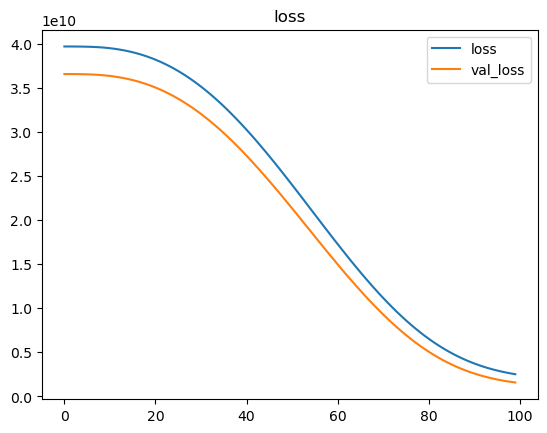

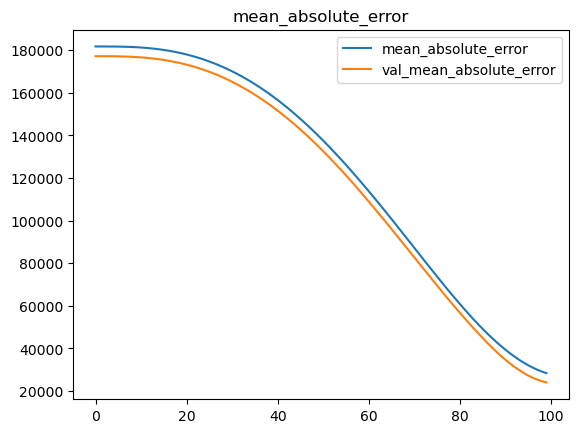

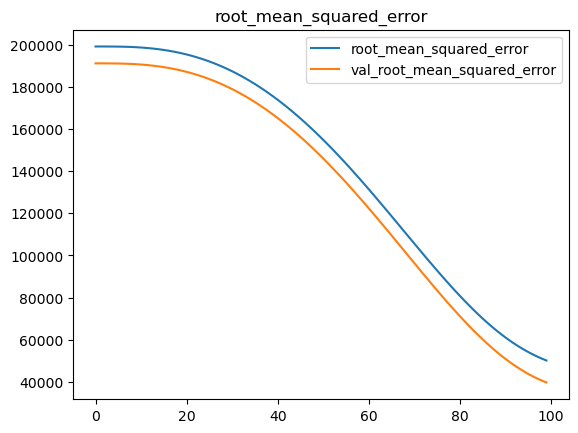

In [187]:
# plot learning
 
plot_history(history)

In [188]:
# evaluate model
 
y_pred = reg_model.predict(X_test_processed)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

12/12 [==============================] - 0s 454us/step
final RMSE: 39673.991772272435
final MAE: 24010.524890237604
final R2: 0.6952156085373056


**Results**

* Need to increase complexity; add nodes and layers

## 2nd Iteration:

In [189]:
model2 = Sequential()

# First hidden layer
model2.add(Dense(30, input_dim = input_dim, activation = 'relu'))

model2.add(Dense(20, activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))

# Output
model2.add(Dense(1, activation = 'linear'))
model2.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

# history

history2 = model2.fit(X_train_processed, y_train,
                   validation_data = (X_test_processed, y_test),
                   epochs = 100)



Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 39692632064.0000 - mean_absolute_error: 181762.3438 - root_mean_squared_error: 199230.0938 - val_loss: 36564643840.0000 - val_mean_absolute_error: 177201.5000 - val_root_mean_squared_error: 191218.8438
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 39687163904.0000 - mean_absolute_error: 181748.2812 - root_mean_squared_error: 199216.3750 - val_loss: 36553781248.0000 - val_mean_absolute_error: 177172.8594 - val_root_mean_squared_error: 191190.4375
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 39663083520.0000 - mean_absolute_error: 181687.4062 - root_mean_squared_error: 199155.9219 - val_loss: 36512346112.0000 - val_mean_absolute_error: 177064.4531 - val_root_mean_squared_error: 191082.0469
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 39585300480.0000 - mean_absolute_error: 181490.4531 - root_mean_squared_error: 198960.5469 - val_loss:

34/34 [==============================] - 0s 1ms/step - loss: 1597230720.0000 - mean_absolute_error: 24256.7188 - root_mean_squared_error: 39965.3672 - val_loss: 911904832.0000 - val_mean_absolute_error: 21474.7441 - val_root_mean_squared_error: 30197.7617
Epoch 32/100
34/34 [==============================] - 0s 1ms/step - loss: 1581011712.0000 - mean_absolute_error: 24030.9062 - root_mean_squared_error: 39761.9375 - val_loss: 898769984.0000 - val_mean_absolute_error: 21277.8418 - val_root_mean_squared_error: 29979.4922
Epoch 33/100
34/34 [==============================] - 0s 1ms/step - loss: 1569025280.0000 - mean_absolute_error: 24014.0996 - root_mean_squared_error: 39610.9219 - val_loss: 890491712.0000 - val_mean_absolute_error: 21279.9121 - val_root_mean_squared_error: 29841.1074
Epoch 34/100
34/34 [==============================] - 0s 1ms/step - loss: 1555090560.0000 - mean_absolute_error: 23709.9648 - root_mean_squared_error: 39434.6367 - val_loss: 878014400.0000 - val_mean_absolu

34/34 [==============================] - 0s 1ms/step - loss: 1363467264.0000 - mean_absolute_error: 21564.2344 - root_mean_squared_error: 36925.1562 - val_loss: 727923840.0000 - val_mean_absolute_error: 19012.1660 - val_root_mean_squared_error: 26980.0645
Epoch 62/100
34/34 [==============================] - 0s 1ms/step - loss: 1357704064.0000 - mean_absolute_error: 21293.9023 - root_mean_squared_error: 36847.0352 - val_loss: 720218304.0000 - val_mean_absolute_error: 18751.5547 - val_root_mean_squared_error: 26836.8828
Epoch 63/100
34/34 [==============================] - 0s 1ms/step - loss: 1354301568.0000 - mean_absolute_error: 21243.3320 - root_mean_squared_error: 36800.8359 - val_loss: 722412160.0000 - val_mean_absolute_error: 18885.9277 - val_root_mean_squared_error: 26877.7266
Epoch 64/100
34/34 [==============================] - 0s 1ms/step - loss: 1348662016.0000 - mean_absolute_error: 21347.8223 - root_mean_squared_error: 36724.1328 - val_loss: 721013376.0000 - val_mean_absolu

34/34 [==============================] - 0s 1ms/step - loss: 1280862080.0000 - mean_absolute_error: 20638.8281 - root_mean_squared_error: 35789.1328 - val_loss: 674185728.0000 - val_mean_absolute_error: 18257.5312 - val_root_mean_squared_error: 25965.0859
Epoch 92/100
34/34 [==============================] - 0s 1ms/step - loss: 1275925120.0000 - mean_absolute_error: 20498.5312 - root_mean_squared_error: 35720.0938 - val_loss: 669591040.0000 - val_mean_absolute_error: 18092.5254 - val_root_mean_squared_error: 25876.4570
Epoch 93/100
34/34 [==============================] - 0s 1ms/step - loss: 1283469696.0000 - mean_absolute_error: 20591.3086 - root_mean_squared_error: 35825.5469 - val_loss: 668370368.0000 - val_mean_absolute_error: 18089.8477 - val_root_mean_squared_error: 25852.8594
Epoch 94/100
34/34 [==============================] - 0s 1ms/step - loss: 1276814336.0000 - mean_absolute_error: 20400.0137 - root_mean_squared_error: 35732.5391 - val_loss: 669251840.0000 - val_mean_absolu

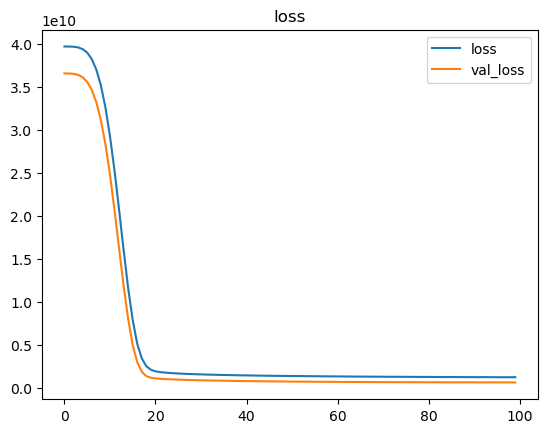

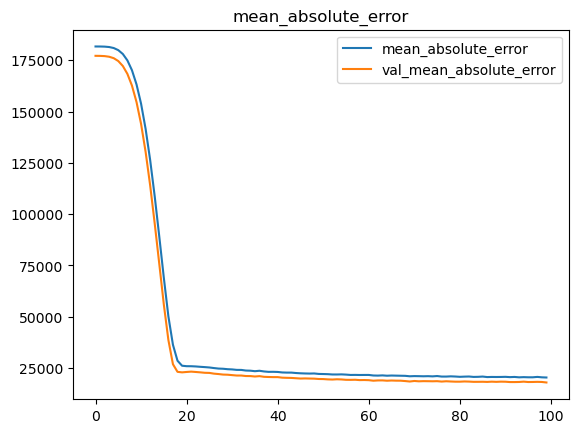

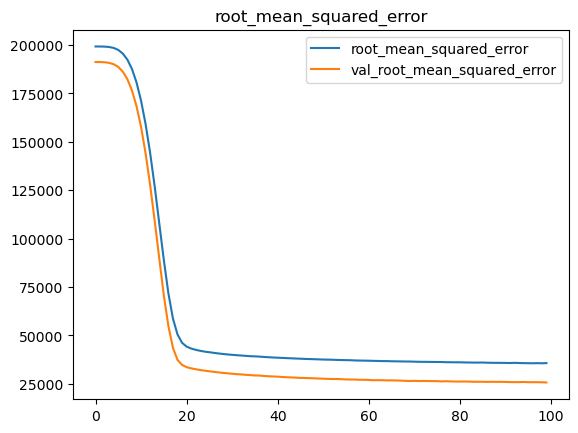

In [190]:
plot_history(history2)

In [191]:
# evaluate model
 
y_pred2 = model2.predict(X_test_processed)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred2)}')
print(f'final R2: {r2_score(y_test, y_pred2)}')

12/12 [==============================] - 0s 501us/step
final RMSE: 25681.459533060275
final MAE: 17889.59265237603
final R2: 0.8722913457691408


** Going to try to add more complexity and see if it makes it better or worse. Great increase in R2 score with last addition of complexity

## Iteration 3:

In [192]:
model3 = Sequential()

# First hidden layer
model3.add(Dense(35, input_dim = input_dim, activation = 'relu'))

model3.add(Dense(30, activation = 'relu'))
model3.add(Dense(25, activation = 'relu'))
model3.add(Dense(20, activation = 'relu'))
model3.add(Dense(15, activation = 'relu'))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(5, activation = 'relu'))

# Output
model3.add(Dense(1, activation = 'linear'))
model3.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

# history

history3 = model3.fit(X_train_processed, y_train,
                   validation_data = (X_test_processed, y_test),
                   epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 39691272192.0000 - mean_absolute_error: 181758.5781 - root_mean_squared_error: 199226.6875 - val_loss: 36559753216.0000 - val_mean_absolute_error: 177187.7500 - val_root_mean_squared_error: 191206.0469
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 39652470784.0000 - mean_absolute_error: 181657.2812 - root_mean_squared_error: 199129.2812 - val_loss: 36442152960.0000 - val_mean_absolute_error: 176874.4688 - val_root_mean_squared_error: 190898.2812
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 39063900160.0000 - mean_absolute_error: 180154.5156 - root_mean_squared_error: 197645.8906 - val_loss: 34866880512.0000 - val_mean_absolute_error: 172687.5000 - val_root_mean_squared_error: 186726.7500
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 33560635392.0000 - mean_absolute_error: 165276.5625 - root_mean_squared_error: 183195.6250 - val_loss:

34/34 [==============================] - 0s 2ms/step - loss: 1172955776.0000 - mean_absolute_error: 18626.1094 - root_mean_squared_error: 34248.4414 - val_loss: 555993088.0000 - val_mean_absolute_error: 16209.2305 - val_root_mean_squared_error: 23579.5059
Epoch 32/100
34/34 [==============================] - 0s 1ms/step - loss: 1174668928.0000 - mean_absolute_error: 18718.0332 - root_mean_squared_error: 34273.4453 - val_loss: 554266112.0000 - val_mean_absolute_error: 16260.8652 - val_root_mean_squared_error: 23542.8574
Epoch 33/100
34/34 [==============================] - 0s 1ms/step - loss: 1174621184.0000 - mean_absolute_error: 18746.0391 - root_mean_squared_error: 34272.7461 - val_loss: 596896256.0000 - val_mean_absolute_error: 17467.2852 - val_root_mean_squared_error: 24431.4609
Epoch 34/100
34/34 [==============================] - 0s 1ms/step - loss: 1190263168.0000 - mean_absolute_error: 18773.0566 - root_mean_squared_error: 34500.1914 - val_loss: 551105920.0000 - val_mean_absolu

34/34 [==============================] - 0s 1ms/step - loss: 1106766848.0000 - mean_absolute_error: 18019.6406 - root_mean_squared_error: 33268.1055 - val_loss: 526819456.0000 - val_mean_absolute_error: 15704.3721 - val_root_mean_squared_error: 22952.5488
Epoch 62/100
34/34 [==============================] - 0s 1ms/step - loss: 1039939200.0000 - mean_absolute_error: 17425.8691 - root_mean_squared_error: 32248.0879 - val_loss: 573584576.0000 - val_mean_absolute_error: 17153.1328 - val_root_mean_squared_error: 23949.6250
Epoch 63/100
34/34 [==============================] - 0s 3ms/step - loss: 1050319936.0000 - mean_absolute_error: 17641.7676 - root_mean_squared_error: 32408.6406 - val_loss: 545430336.0000 - val_mean_absolute_error: 16488.1426 - val_root_mean_squared_error: 23354.4492
Epoch 64/100
34/34 [==============================] - 0s 1ms/step - loss: 1050507840.0000 - mean_absolute_error: 17559.6094 - root_mean_squared_error: 32411.5391 - val_loss: 524615168.0000 - val_mean_absolu

34/34 [==============================] - 0s 1ms/step - loss: 972606912.0000 - mean_absolute_error: 16911.8262 - root_mean_squared_error: 31186.6465 - val_loss: 539227264.0000 - val_mean_absolute_error: 16152.5107 - val_root_mean_squared_error: 23221.2676
Epoch 92/100
34/34 [==============================] - 0s 1ms/step - loss: 989875264.0000 - mean_absolute_error: 17248.3906 - root_mean_squared_error: 31462.2832 - val_loss: 551975872.0000 - val_mean_absolute_error: 16411.5215 - val_root_mean_squared_error: 23494.1660
Epoch 93/100
34/34 [==============================] - 0s 1ms/step - loss: 967507392.0000 - mean_absolute_error: 16922.5469 - root_mean_squared_error: 31104.7812 - val_loss: 541422080.0000 - val_mean_absolute_error: 16182.9541 - val_root_mean_squared_error: 23268.4785
Epoch 94/100
34/34 [==============================] - 0s 1ms/step - loss: 971806848.0000 - mean_absolute_error: 16821.3945 - root_mean_squared_error: 31173.8164 - val_loss: 567137280.0000 - val_mean_absolute_e

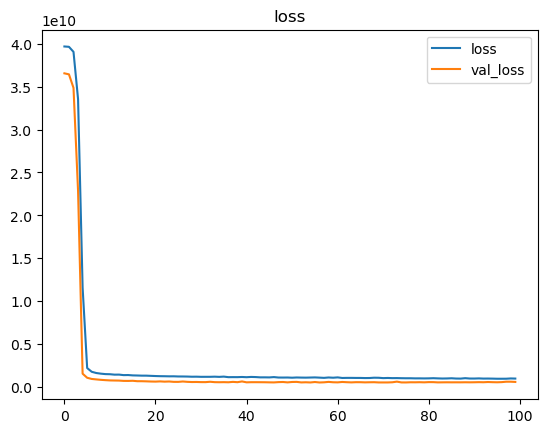

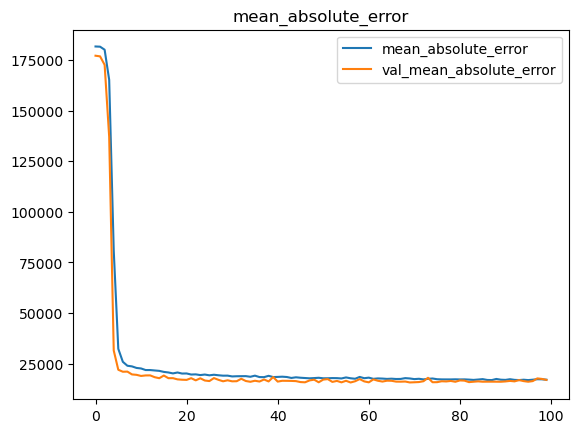

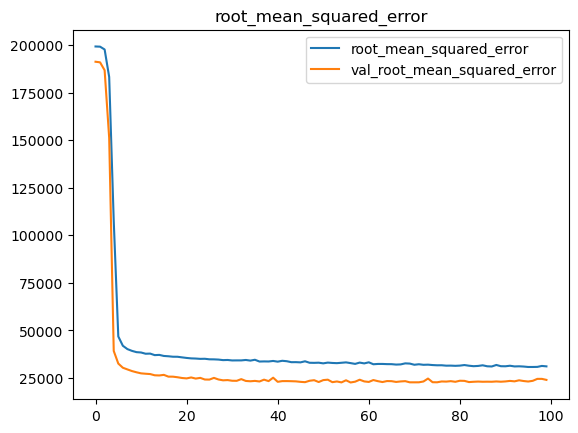

In [193]:
plot_history(history3)

In [194]:
y_pred3 = model3.predict(X_test_processed)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred3))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred3)}')
print(f'final R2: {r2_score(y_test, y_pred3)}')

12/12 [==============================] - 0s 463us/step
final RMSE: 24030.86211988478
final MAE: 16903.98994920799
final R2: 0.8881799640177569


** Best iteration yet. Slight increase in R2 now at 0.88 which is great. MAE and RMSE decreased as well. 

## Iteration 4: Regularization
* Required for assignment**

In [195]:
model4 = Sequential()

# First hidden layer
model4.add(Dense(35, input_dim = input_dim, activation = 'relu'))

model4.add(Dropout(.2))
model4.add(Dense(30, activation = 'relu'))
model4.add(Dropout(.2))
model4.add(Dense(25, activation = 'relu'))
model4.add(Dropout(.2))
model4.add(Dense(20, activation = 'relu'))
model4.add(Dropout(.2))
model4.add(Dense(15, activation = 'relu'))
model4.add(Dropout(.2))
model4.add(Dense(10, activation = 'relu'))
model4.add(Dropout(.2))
model4.add(Dense(5, activation = 'relu'))
model4.add(Dropout(.2))

# Output
model4.add(Dense(1, activation = 'linear'))
model4.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

# history

history4 = model4.fit(X_train_processed, y_train,
                   validation_data = (X_test_processed, y_test),
                   epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 39693348864.0000 - mean_absolute_error: 181764.2031 - root_mean_squared_error: 199231.8906 - val_loss: 36566601728.0000 - val_mean_absolute_error: 177206.7031 - val_root_mean_squared_error: 191223.9531
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 39693090816.0000 - mean_absolute_error: 181763.4375 - root_mean_squared_error: 199231.2500 - val_loss: 36565737472.0000 - val_mean_absolute_error: 177204.2344 - val_root_mean_squared_error: 191221.7031
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 39681384448.0000 - mean_absolute_error: 181731.8750 - root_mean_squared_error: 199201.8750 - val_loss: 36517351424.0000 - val_mean_absolute_error: 177072.8750 - val_root_mean_squared_error: 191095.1406
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 39194292224.0000 - mean_absolute_error: 180483.1250 - root_mean_squared_error: 197975.4844 - val_loss:

34/34 [==============================] - 0s 1ms/step - loss: 7336089088.0000 - mean_absolute_error: 63517.6680 - root_mean_squared_error: 85650.9688 - val_loss: 1884478464.0000 - val_mean_absolute_error: 34817.3398 - val_root_mean_squared_error: 43410.5820
Epoch 32/100
34/34 [==============================] - 0s 1ms/step - loss: 6930565120.0000 - mean_absolute_error: 62226.5078 - root_mean_squared_error: 83250.0156 - val_loss: 1629903104.0000 - val_mean_absolute_error: 31883.5977 - val_root_mean_squared_error: 40372.0586
Epoch 33/100
34/34 [==============================] - 0s 1ms/step - loss: 7093211648.0000 - mean_absolute_error: 61297.1992 - root_mean_squared_error: 84221.2031 - val_loss: 1528474880.0000 - val_mean_absolute_error: 30773.5156 - val_root_mean_squared_error: 39095.7148
Epoch 34/100
34/34 [==============================] - 0s 1ms/step - loss: 6319935488.0000 - mean_absolute_error: 60203.6758 - root_mean_squared_error: 79498.0234 - val_loss: 1030739648.0000 - val_mean_ab

34/34 [==============================] - 0s 1ms/step - loss: 5858786304.0000 - mean_absolute_error: 57679.4844 - root_mean_squared_error: 76542.7109 - val_loss: 966518720.0000 - val_mean_absolute_error: 22561.1035 - val_root_mean_squared_error: 31088.8848
Epoch 62/100
34/34 [==============================] - 0s 1ms/step - loss: 6079891456.0000 - mean_absolute_error: 57898.8320 - root_mean_squared_error: 77973.6562 - val_loss: 1593787904.0000 - val_mean_absolute_error: 32202.4355 - val_root_mean_squared_error: 39922.2734
Epoch 63/100
34/34 [==============================] - 0s 1ms/step - loss: 7133651456.0000 - mean_absolute_error: 62268.0234 - root_mean_squared_error: 84460.9453 - val_loss: 1845406080.0000 - val_mean_absolute_error: 34936.3008 - val_root_mean_squared_error: 42958.1914
Epoch 64/100
34/34 [==============================] - 0s 1ms/step - loss: 6673450496.0000 - mean_absolute_error: 59155.0117 - root_mean_squared_error: 81691.1875 - val_loss: 1170390912.0000 - val_mean_abs

34/34 [==============================] - 0s 1ms/step - loss: 6570355200.0000 - mean_absolute_error: 60139.8945 - root_mean_squared_error: 81057.7266 - val_loss: 1889170304.0000 - val_mean_absolute_error: 35742.0742 - val_root_mean_squared_error: 43464.5859
Epoch 92/100
34/34 [==============================] - 0s 1ms/step - loss: 6718896640.0000 - mean_absolute_error: 61016.5156 - root_mean_squared_error: 81968.8750 - val_loss: 1117206272.0000 - val_mean_absolute_error: 25222.9980 - val_root_mean_squared_error: 33424.6367
Epoch 93/100
34/34 [==============================] - 0s 1ms/step - loss: 6442819072.0000 - mean_absolute_error: 60160.9258 - root_mean_squared_error: 80267.1719 - val_loss: 1522465792.0000 - val_mean_absolute_error: 31675.1895 - val_root_mean_squared_error: 39018.7891
Epoch 94/100
34/34 [==============================] - 0s 1ms/step - loss: 5906578944.0000 - mean_absolute_error: 57249.9492 - root_mean_squared_error: 76854.2734 - val_loss: 1277921536.0000 - val_mean_ab

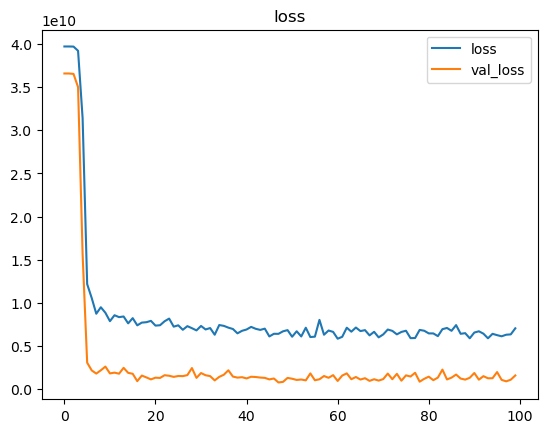

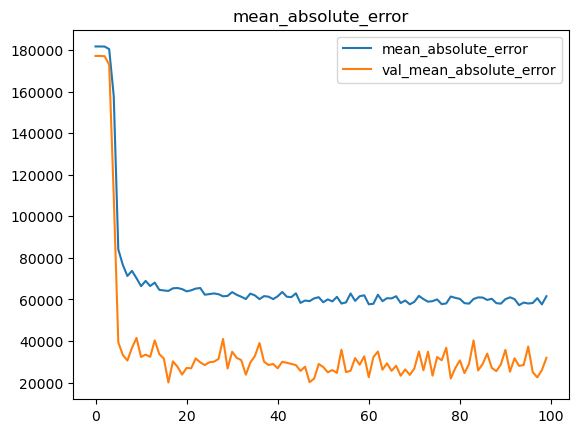

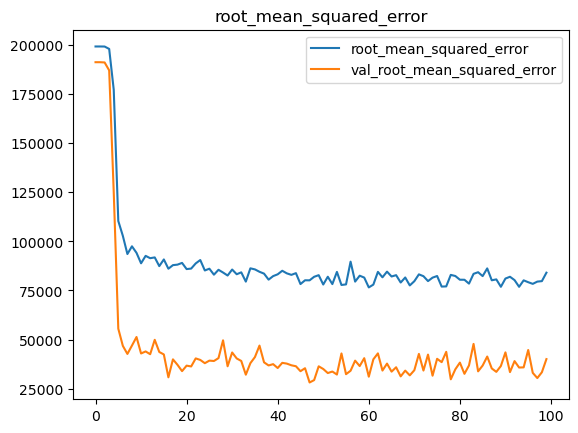

In [196]:
plot_history(history4)

In [197]:
y_pred4 = model4.predict(X_test_processed)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred4))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred4)}')
print(f'final R2: {r2_score(y_test, y_pred4)}')

12/12 [==============================] - 0s 535us/step
final RMSE: 40042.56324741393
final MAE: 31888.929913481406
final R2: 0.6895264089812273


**Final**
* I choose the 3rd iteration. Had the best overall metrics. 